In [1]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

import wrangle

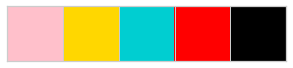

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']
# Set your custom color palette
my_pal = sns.color_palette(heat)
sns.palplot(my_pal)

In [4]:
# acquire data
df = pd.read_csv("train_maybe_final.csv")

In [6]:
df.shape

(5513024, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513024 entries, 0 to 5513023
Data columns (total 20 columns):
Unnamed: 0         int64
Unnamed: 0.1       int64
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: float64(4), int64(6), object(10)
memory usage: 841.2+ MB


In [8]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [9]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [10]:
df = df[df.world != "NONE"]

In [12]:
agg = df.groupby(['installation_id', 'world'])[['title']].count()

In [13]:
agg = agg.reset_index()

In [14]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()

In [15]:
agg.columns = ['installation_id', ' crystalcaves', 'magamapeak', 'treetopcity']

In [16]:
agg

,installation_id,crystalcaves,magamapeak,treetopcity
0,0006a69f,0.0,725.0,1878.0
1,0006c192,204.0,1336.0,664.0
2,00129856,0.0,0.0,43.0
3,001d0ed0,246.0,0.0,159.0
4,00225f67,0.0,0.0,636.0
...,...,...,...,...
3518,ff9305d7,344.0,680.0,1030.0
3519,ff9715db,464.0,928.0,544.0
3520,ffc90c32,489.0,827.0,684.0
3521,ffd2871d,0.0,927.0,0.0
